In [1]:
import os, subprocess
import json
import uproot3
import awkward as ak
import numpy as np
from coffea import processor, util, hist

from plotter import *

In [2]:
lumis = {}
lumis['2016'] = 35.9
lumis['2017'] = 41.5
lumis['2018'] = 59.9

with open('xsec.json') as f:
  xs = json.load(f)

with open('pmap.json') as f:
  pmap = json.load(f)

systematics = ['nominal',
               'jet_triggerUp','jet_triggerDown',
               'btagWeightUp','btagWeightDown','btagEffStatUp','btagEffStatDown',
               'UESUp','UESDown','JESUp','JESDown','JERUp','JERDown',
              ]

In [3]:
year = '2016'
nfiles = len(subprocess.getoutput("ls infiles-split/"+year+"*.json").split())
outsum = processor.dict_accumulator()

In [4]:
# Load all files
for n in range(1,nfiles+1):

    with open('infiles-split/'+year+'_'+str(n)+'.json') as f:
      infiles = json.load(f)
    
    #filename = '/myeosdir/vbf-category/outfiles/'+year+'_'+str(n)+'.coffea'
    filename = 'outfiles/'+year+'_'+str(n)+'.coffea'
    if os.path.isfile(filename):
        out = util.load(filename)
        outsum.add(out)
    else:
        print(n,infiles.keys())
        #print("File " + filename + " is missing")
        
scale_lumi = {k: xs[k] * 1000 *lumis[year] / w for k, w in outsum['sumw'].items()}
#outsum['templates'].scale(scale_lumi, 'dataset')
outsum['templates-vbf'].scale(scale_lumi, 'dataset')
#outsum['muonkin'].scale(scale_lumi, 'dataset')
#outsum['mujetkin'].scale(scale_lumi, 'dataset')
outsum['cutflow_msd'].scale(scale_lumi, 'dataset')

1 dict_keys(['DYJetsToLL_M-50_HT-1200to2500_TuneCUETP8M1_13TeV-madgraphMLM-pythia8'])
3 dict_keys(['DYJetsToLL_M-50_HT-2500toInf_TuneCUETP8M1_13TeV-madgraphMLM-pythia8'])
5 dict_keys(['DYJetsToLL_M-50_HT-400to600_TuneCUETP8M1_13TeV-madgraphMLM-pythia8'])
6 dict_keys(['DYJetsToLL_M-50_HT-400to600_TuneCUETP8M1_13TeV-madgraphMLM-pythia8'])
7 dict_keys(['DYJetsToLL_M-50_HT-400to600_TuneCUETP8M1_13TeV-madgraphMLM-pythia8'])
8 dict_keys(['DYJetsToLL_M-50_HT-400to600_TuneCUETP8M1_13TeV-madgraphMLM-pythia8'])
9 dict_keys(['DYJetsToLL_M-50_HT-400to600_TuneCUETP8M1_13TeV-madgraphMLM-pythia8'])
10 dict_keys(['DYJetsToLL_M-50_HT-400to600_TuneCUETP8M1_13TeV-madgraphMLM-pythia8'])
11 dict_keys(['DYJetsToLL_M-50_HT-400to600_TuneCUETP8M1_13TeV-madgraphMLM-pythia8'])
13 dict_keys(['DYJetsToLL_M-50_HT-600to800_TuneCUETP8M1_13TeV-madgraphMLM-pythia8'])
14 dict_keys(['DYJetsToLL_M-50_HT-600to800_TuneCUETP8M1_13TeV-madgraphMLM-pythia8'])
15 dict_keys(['DYJetsToLL_M-50_HT-600to800_TuneCUETP8M1_13TeV-madgrap

580 dict_keys(['TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8'])
581 dict_keys(['TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8'])
582 dict_keys(['TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8'])
583 dict_keys(['TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8'])
584 dict_keys(['TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8'])
585 dict_keys(['TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8'])
586 dict_keys(['TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8'])
587 dict_keys(['TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8'])
588 dict_keys(['TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8'])
589 dict_keys(['TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8'])
590 dict_keys(['TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8'])
591 dict_keys(['TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8'])
592 dict_keys(['TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8'])
593 dict_keys(['TTTo2L2Nu_TuneCP5_PSweights_13TeV-powheg-pythia8'])
594 dict_keys(['TTTo2L2Nu_TuneCP5_PSweights_13Te

727 dict_keys(['WJetsToLNu_HT-200To400_TuneCUETP8M1_13TeV-madgraphMLM-pythia8'])
728 dict_keys(['WJetsToLNu_HT-200To400_TuneCUETP8M1_13TeV-madgraphMLM-pythia8'])
729 dict_keys(['WJetsToLNu_HT-200To400_TuneCUETP8M1_13TeV-madgraphMLM-pythia8'])
730 dict_keys(['WJetsToLNu_HT-200To400_TuneCUETP8M1_13TeV-madgraphMLM-pythia8'])
731 dict_keys(['WJetsToLNu_HT-200To400_TuneCUETP8M1_13TeV-madgraphMLM-pythia8'])
732 dict_keys(['WJetsToLNu_HT-200To400_TuneCUETP8M1_13TeV-madgraphMLM-pythia8'])
733 dict_keys(['WJetsToLNu_HT-200To400_TuneCUETP8M1_13TeV-madgraphMLM-pythia8'])
734 dict_keys(['WJetsToLNu_HT-200To400_TuneCUETP8M1_13TeV-madgraphMLM-pythia8'])
735 dict_keys(['WJetsToLNu_HT-200To400_TuneCUETP8M1_13TeV-madgraphMLM-pythia8'])
738 dict_keys(['WJetsToLNu_HT-2500ToInf_TuneCUETP8M1_13TeV-madgraphMLM-pythia8'])
739 dict_keys(['WJetsToLNu_HT-2500ToInf_TuneCUETP8M1_13TeV-madgraphMLM-pythia8'])
741 dict_keys(['WJetsToLNu_HT-400To600_TuneCUETP8M1_13TeV-madgraphMLM-pythia8'])
742 dict_keys(['WJetsToLNu

In [5]:
cutflow = outsum['cutflow_msd'].group('dataset', hist.Cat('process', 'Process'), pmap).sum('genflavor').integrate('region','muoncontrol').sum('msd')

/opt/conda/lib/python3.8/site-packages/coffea/hist/hist_tools.py:347: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f47cc79e310>
  warnings.warn("Not all requested indices present in %r" % self, RuntimeWarning)


In [6]:
cutflow.integrate('process','muondata').values()

{(): array([1.1224182e+07, 3.7190510e+06, 5.0838100e+05, 5.0838100e+05,
        1.7619100e+05, 5.6893000e+04, 5.3023000e+04, 7.3450000e+03,
        3.8490000e+03, 0.0000000e+00, 0.0000000e+00])}

In [7]:
cutflow.integrate('process','ttbar').values()

{(): array([3.42083673e+05, 3.42083673e+05, 1.84188653e+05, 1.84188653e+05,
        6.72804269e+04, 3.29699375e+04, 3.10411417e+04, 3.39664074e+01,
        3.39664074e+01, 0.00000000e+00, 0.00000000e+00])}

In [8]:
templates = outsum['templates-vbf'].group('dataset', hist.Cat('process', 'Process'), pmap).integrate('systematic','nominal')
muonkin = outsum['muonkin'].group('dataset', hist.Cat('process', 'Process'), pmap).integrate('systematic','nominal')
mujetkin = outsum['mujetkin'].group('dataset', hist.Cat('process', 'Process'), pmap).integrate('systematic','nominal')

/opt/conda/lib/python3.8/site-packages/coffea/hist/hist_tools.py:347: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f47cb8353d0>
  warnings.warn("Not all requested indices present in %r" % self, RuntimeWarning)
/opt/conda/lib/python3.8/site-packages/coffea/hist/hist_tools.py:347: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f47cb841130>
  warnings.warn("Not all requested indices present in %r" % self, RuntimeWarning)
/opt/conda/lib/python3.8/site-packages/coffea/hist/hist_tools.py:347: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f47cb841640>
  warnings.warn("Not all requested indices present in %r" % self, RuntimeWarning)


ValueError: Reducing along axis <Bin (name=deta) instance at 0x7f47cb835880>: requested start 3 exceeds bin boundaries (use open slicing, e.g. x[:stop])

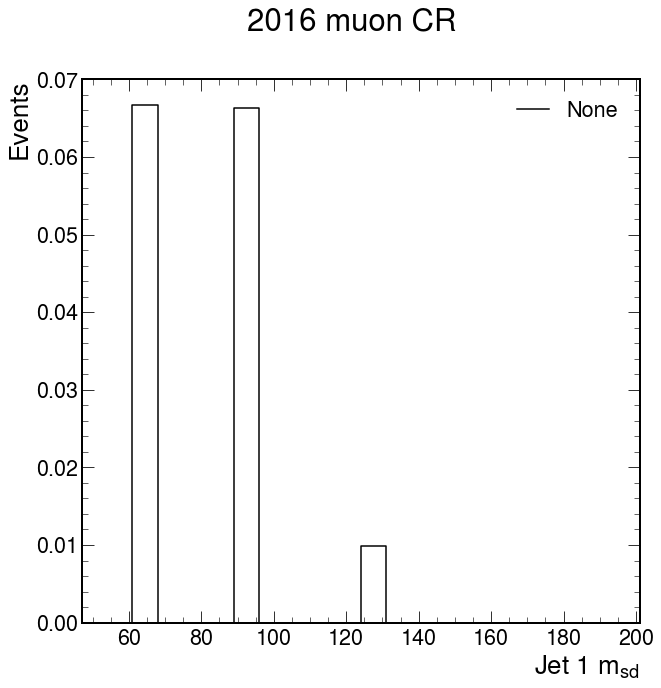

In [9]:
from plotter import *
h = templates.sum('ddb1','pt1').integrate('process','ttbar')#.integrate('region', 'muoncontrol')
plot_vbfcr(h,[],year+'/inclusive/muCR_msd1',year+" muon CR")

In [ ]:
h = templates.integrate('region', 'muoncontrol').sum('ptmu','etamu').integrate('ddb1',int_range=slice(0.89,1))
plot_vbfcr(h,year+'/vbf/muCR_msd1_pass',year+" muon CR, DBB pass")
h = templates.integrate('region', 'muoncontrol').sum('ptmu','etamu').integrate('ddb1',int_range=slice(0,0.89))
plot_vbfcr(h,year+'/vbf/muCR_msd1_fail',year+" muon CR, DDB fail")
h = templates.integrate('region', 'muoncontrol').sum('ptmu','etamu','ddb1')
plot_vbfcr(h,year+'/vbf/muCR_msd1',year+" muon CR")  

In [ ]:
h = templates.integrate('region', 'muoncontrol').sum('msd1','etamu').integrate('ddb1',int_range=slice(0.89,1))
plot_vbfcr(h,year+'/vbf/muCR_ptmu_pass',year+" muon CR, DDB pass")
h = templates.integrate('region', 'muoncontrol').sum('msd1','etamu').integrate('ddb1',int_range=slice(0,0.89))
plot_vbfcr(h,year+'/vbf/muCR_ptmu_fail',year+" muon CR, DDB fail")
h = templates.integrate('region', 'muoncontrol').sum('msd1','etamu','ddb1')
plot_vbfcr(h,year+'/vbf/muCR_ptmu',year+" muon CR")